# COVID-19 Headlines

[The anonymous web service Top.st](top.st) extracts the contemporary most-shared news. The [social-bot Topstbot](https://botsin.space/topst) promotes the top most headline on the [federated social-media platform Mastodon](https://mastodon.io). Assuming, its feed can be regarded as an archive of top relevant news headlines, how did German media react to the COVID-19 numbers?

In [1]:
from scrape import entorb

cases = entorb.to_dataframe('DE-total')

In [2]:
cases_new = cases['Cases_New']
high_cases_new = cases_new[(cases_new.shift(1) < cases_new) & (cases_new.shift(-1) < cases_new)]
low_cases_new = cases_new[(cases_new.shift(1) > cases_new) & (cases_new.shift(-1) > cases_new)]

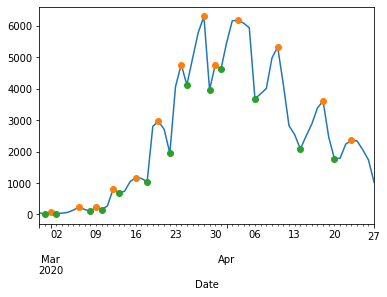

In [3]:
import matplotlib.pyplot as plt
cases_new.plot(kind='line')
high_cases_new.plot(kind='line', linestyle='', marker='o')
low_cases_new.plot(kind='line', linestyle='', marker='o')

In [4]:
#!pip install tabulate
import pandas as pd
from lxml.html.soupparser import fromstring
from scrape import topstbot

nation = 'de'
headlines = topstbot.to_dataframe(since='2020-03-01T00:00:00.000Z', tagged=['day', nation])

headlines['content'] = [fromstring(h).text_content() for h in headlines['content']]
headlines['date'] = headlines.index.normalize().tz_localize(None)
headlines['text'] = [x.split("\t")[0] for x in headlines['content']]
headlines['url'] = [x.split("\t")[1].replace('#news #day #de', '') for x in headlines['content']]
headlines = headlines \
.reset_index() \
.drop(columns=['content', 'url']) \
.set_index('date')

In [5]:
# high cases
pd.set_option('display.max_colwidth', 100)
display(headlines \
        .loc[headlines.index.intersection(high_cases_new.index).drop_duplicates()] \
        .set_index('created_at'))

,text
created_at,
2020-04-23 18:00:07.589000+00:00,"Corona - zweite Welle: ""Regierung hat mit den Lockerungen ein falsches Signal gesendet"""
2020-04-23 06:00:07.019000+00:00,Coronavirus: Deutschland startet erste klinische Prüfung von Impfstoff
2020-04-18 18:00:06.581000+00:00,Die FOCUS-Kolumne von Jan Fleischhauer - Rhetorik der Angst: Wie die Regierung die Deutschen in ...
2020-04-18 06:00:08.048000+00:00,Meinung am Mittag: Ferien-Debatte: Die lausigen Krisenmanager der Bildungspolitik
2020-04-10 18:00:08.686000+00:00,"Diesel Fahrverbote - Kaum Verkehr, trotzdem Grenzwert-Überschreitung: Corona entlarvt Fahrverbot..."
2020-04-10 06:00:09.151000+00:00,"Besuche, Ausflüge, Ostereier-Suche - Was darf ich an Ostern überhaupt? Die große Corona-Regeln-Ü..."
2020-04-03 18:00:08.162000+00:00,"Coronavirus in Deutschland – über 1.000 Tote, 81.700 Infizierte"
2020-04-03 06:00:09.245000+00:00,Kamera filmt Herzlos-Herrchen - Armen Hund einfach am Tierheim angebunden
2020-03-30 18:00:08.574000+00:00,Coronavirus in Deutschland: Mehr als 62.000 Infizierte – Live-Karte


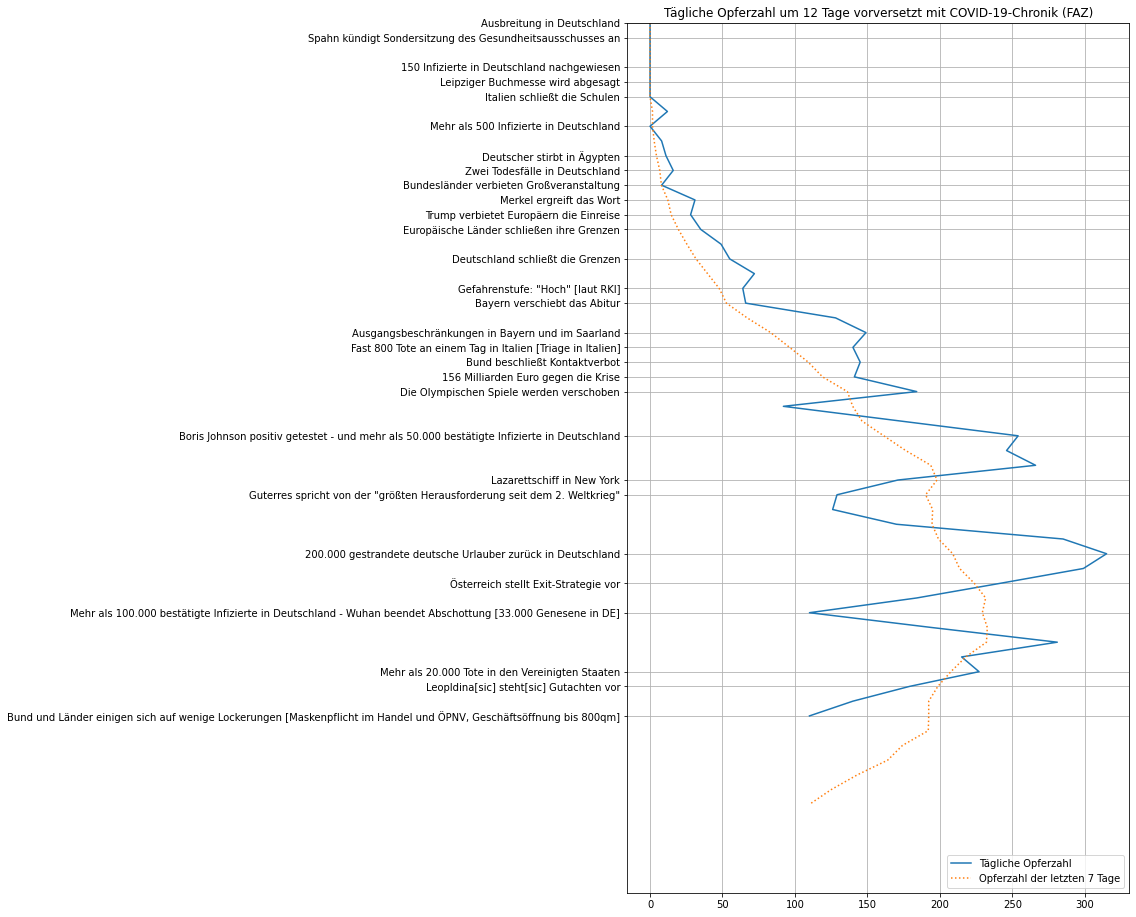

In [6]:
news = pd.read_csv('data/chronic_de.tsv', sep="\t", usecols=['Datum', 'Ereignis'])
news['Datum'] = pd.to_datetime(news['Datum'], format='%Y-%m-%d')
news = news.set_index('Datum')

dt = 12
shifted = cases['Deaths_New'].sort_index().shift(-dt)

fig, ax = plt.subplots()
ax.plot(shifted, shifted.index, label='Tägliche Opferzahl')
ax.plot(shifted.rolling('7D').mean(), shifted.index, linestyle=':', label='Opferzahl der letzten 7 Tage')
ax.set_title("Tägliche Opferzahl um %d Tage vorversetzt mit COVID-19-Chronik (FAZ)" % dt)
ax.set_yticks(news.index)
ax.set_ylim((cases.index.max(), cases.index.min()))
ax.set_yticklabels(news['Ereignis'])
ax.grid()
fig.set_size_inches(9,16)
plt.legend(loc='lower right')
t = ax.set_ylabel('')